In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, DateFormatter
warnings.filterwarnings('ignore')

path=''

In [184]:
#reads the csv
stocks_spain = pd.read_excel(f'{path}data/stocks_spain_2000.xlsx')
stocks_spain.drop(columns=stocks_spain.columns[0], axis=1, inplace=True)
stocks_spain

,Date,A3M,ELE,BKT,ECR,REP,RED,CAF,EBRO,ALB,...,BBVA,SAB,CIE,ACX,COL,ANA,TL5,MAP,IBE,IDR
0,2005-01-03,13.6250,17.080000,4.914858,5.800,19.200001,4.1250,6.175000,10.404929,26.000000,...,12.614568,2.563590,2.060349,11.940,223.617294,65.550003,13.907362,2.181585,4.6225,12.71
1,2005-01-04,14.3125,17.000000,4.893535,5.900,19.160000,4.1675,6.175000,10.484125,26.500000,...,12.547316,2.578408,2.042510,11.910,223.617294,66.599998,14.567894,2.193495,4.6500,12.73
2,2005-01-05,14.1250,16.770000,4.889773,5.900,18.850000,4.1250,6.325000,10.682125,26.150000,...,12.480064,2.563590,2.042510,11.640,221.614197,65.750000,14.341684,2.161734,4.6000,12.60
3,2005-01-06,14.1250,16.770000,4.889773,5.900,18.850000,4.1250,6.325000,10.682125,26.150000,...,12.480064,2.563590,2.042510,11.640,221.614197,65.750000,14.341684,2.124018,4.6000,12.60
4,2005-01-07,14.8125,16.740000,4.889773,5.900,18.879999,4.1050,6.320000,10.711829,25.850000,...,12.604961,2.533953,2.051430,11.420,220.703705,65.750000,14.857442,2.149824,4.6275,12.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4656,2023-03-14,3.4660,18.885000,6.098000,4.235,14.390000,15.7450,26.350000,16.600000,44.849998,...,6.690000,1.139000,26.120001,9.696,6.130000,177.000000,3.098000,1.913000,10.8600,11.57
4657,2023-03-15,3.3800,18.490000,5.704000,3.980,13.390000,15.4200,25.450001,16.260000,44.450001,...,6.048000,1.019500,25.260000,9.024,5.945000,173.300003,3.052000,1.822000,10.8750,11.34
4658,2023-03-16,3.3800,18.795000,5.560000,4.055,13.305000,15.6050,24.799999,16.400000,44.799999,...,6.254000,1.014500,25.580000,9.034,5.855000,176.199997,3.062000,1.832000,11.0500,11.37
4659,2023-03-17,3.3460,18.525000,5.420000,3.985,13.485000,15.4250,24.750000,16.459999,45.299999,...,6.036000,0.982600,24.740000,8.982,5.810000,177.000000,3.022000,1.801000,10.9200,11.22


Seleccionar una fecha sobre la que hacer análisis (borraremos los datos posteriores a esa fecha)

In [193]:
def DateFilter (time, finish_date_str, show=False):
    # convert date column to datetime format
    stocks_spain['Date'] = pd.to_datetime(stocks_spain['Date'])
    
    if type(finish_date_str) == str:
        finish_date = datetime.strptime(finish_date_str, '%Y-%m-%d')
    else:
        finish_date = finish_date_str
    
    start_date = finish_date - timedelta(days=time)
    # filter the dataframe to keep rows before and after the filter date 
    stocks_filter = stocks_spain[(stocks_spain['Date'] <= finish_date) & (stocks_spain['Date'] >= start_date)]

    # print the resulting dataframe
    if show==True:
        print(f'Start date: {start_date}')
        print(f'Finish date: {finish_date}')
        
    return stocks_filter, start_date, finish_date

In [197]:
#Crahs inicio covid: '2020-02-09'

stocks_filter, start_date, finish_date = DateFilter (time=100, finish_date_str = '2020-02-09')
print(stocks_filter)

           Date    A3M        ELE    BKT    ECR     REP        RED        CAF  \
3793 2019-11-01  3.760  24.250000  6.292  2.334  15.145  18.059999  40.349998   
3794 2019-11-04  3.846  24.270000  6.450  2.420  15.470  18.010000  40.349998   
3795 2019-11-05  3.818  24.070000  6.512  2.418  15.415  17.955000  41.549999   
3796 2019-11-06  3.748  24.030001  6.394  2.502  15.130  17.959999  41.200001   
3797 2019-11-07  3.786  23.660000  6.540  2.590  15.145  17.950001  41.099998   
...         ...    ...        ...    ...    ...     ...        ...        ...   
3857 2020-02-03  3.042  24.760000  5.874  2.560  12.285  17.995001  39.900002   
3858 2020-02-04  3.038  24.629999  5.942  2.564  12.580  17.930000  39.849998   
3859 2020-02-05  3.094  24.840000  6.090  2.580  12.795  18.090000  40.200001   
3860 2020-02-06  3.090  25.070000  6.128  2.628  12.825  18.010000  41.000000   
3861 2020-02-07  3.058  24.990000  6.150  2.700  12.755  18.160000  40.349998   

           EBRO        ALB 

In [198]:
# Calculate returns
logreturn = np.log(stocks_filter.iloc[:,1:]).diff()
logreturn = logreturn.iloc[1: , :]
logreturn

,A3M,ELE,BKT,ECR,REP,RED,CAF,EBRO,ALB,VID,...,BBVA,SAB,CIE,ACX,COL,ANA,TL5,MAP,IBE,IDR
3794,0.022615,0.000824,0.024801,0.036184,0.021232,-0.002772,0.000000,-0.002062,0.009950,0.001281,...,0.030176,0.024953,0.040042,0.038033,0.004365,-0.002689,0.002560,0.007087,-0.004369,0.002265
3795,-0.007307,-0.008275,0.009567,-0.000827,-0.003562,-0.003059,0.029306,-0.007770,0.008762,-0.002564,...,0.015460,0.021851,0.025541,0.019693,-0.010508,-0.004317,-0.003659,0.002742,-0.010563,0.004515
3796,-0.018504,-0.001663,-0.018287,0.034150,-0.018662,0.000278,-0.008459,0.001040,-0.006565,0.016550,...,-0.010144,-0.011594,0.001738,0.015437,0.009637,0.002701,0.016722,-0.005886,0.000885,0.035402
3797,0.010088,-0.015517,0.022577,0.034567,0.000991,-0.000557,-0.002430,0.003112,0.004381,0.011300,...,0.017184,0.017818,0.011221,0.018596,0.007816,0.000539,0.004675,0.013680,-0.019193,0.024693
3798,0.000528,0.010511,-0.020702,-0.067890,-0.006957,-0.009235,0.003643,-0.002074,0.005450,0.001248,...,-0.006233,-0.007185,-0.010354,0.025095,0.004316,0.019750,0.010707,-0.003890,0.010312,0.009499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3857,-0.005246,-0.000404,0.003411,-0.012423,-0.014546,-0.002220,-0.003752,-0.001072,-0.009874,-0.010363,...,-0.000750,0.008319,-0.019883,0.006794,-0.000827,-0.011788,0.001816,0.005177,0.003237,0.007692
3858,-0.001316,-0.005264,0.011510,0.001561,0.023729,-0.003619,-0.001254,0.002677,0.006593,-0.002086,...,0.025503,0.017631,0.026424,0.022097,0.013158,0.005911,0.003823,0.011976,0.004434,0.026467
3859,0.018265,0.008490,0.024602,0.006221,0.016946,0.008884,0.008745,0.000535,0.008724,0.000000,...,0.029140,-0.004078,0.014933,0.036415,0.000817,0.027133,0.018506,0.016446,0.025217,0.019400
3860,-0.001294,0.009217,0.006220,0.018434,0.002342,-0.004432,0.019705,-0.005896,-0.003263,0.018615,...,0.034510,0.016214,-0.009931,0.025637,0.012171,0.007619,0.003543,-0.003771,0.017493,0.014532


In [199]:
#creates a correlation matrix
cor_matrix = logreturn.corr()

#shows the first 5 rows
cor_matrix.head()

,A3M,ELE,BKT,ECR,REP,RED,CAF,EBRO,ALB,VID,...,BBVA,SAB,CIE,ACX,COL,ANA,TL5,MAP,IBE,IDR
A3M,1.000000,0.074277,0.347963,0.147321,0.258711,-0.068901,0.066317,0.245191,0.063662,0.010134,...,0.231110,0.157878,0.341883,0.269166,-0.131524,0.317883,0.425562,0.596814,0.016049,0.197347
ELE,0.074277,1.000000,0.129437,0.308034,0.281199,0.516334,0.024789,0.070940,0.291123,0.085638,...,0.170404,0.009176,0.052410,0.046313,0.444842,0.432675,0.119599,0.202856,0.640374,0.324218
BKT,0.347963,0.129437,1.000000,0.329350,0.500415,0.183225,0.118759,0.082663,0.228595,-0.027066,...,0.758026,0.563800,0.361217,0.394849,-0.071769,0.103571,0.298607,0.440743,0.054372,0.319047
ECR,0.147321,0.308034,0.329350,1.000000,0.356361,0.295327,0.084515,0.047062,0.140276,0.138139,...,0.360476,0.167515,0.413834,0.176066,0.345134,0.262710,0.234798,0.434590,0.145586,0.372672
REP,0.258711,0.281199,0.500415,0.356361,1.000000,0.094979,0.151957,0.150440,0.292474,-0.030916,...,0.524991,0.287986,0.466315,0.478059,0.233891,0.274768,0.401624,0.461994,0.170298,0.414791


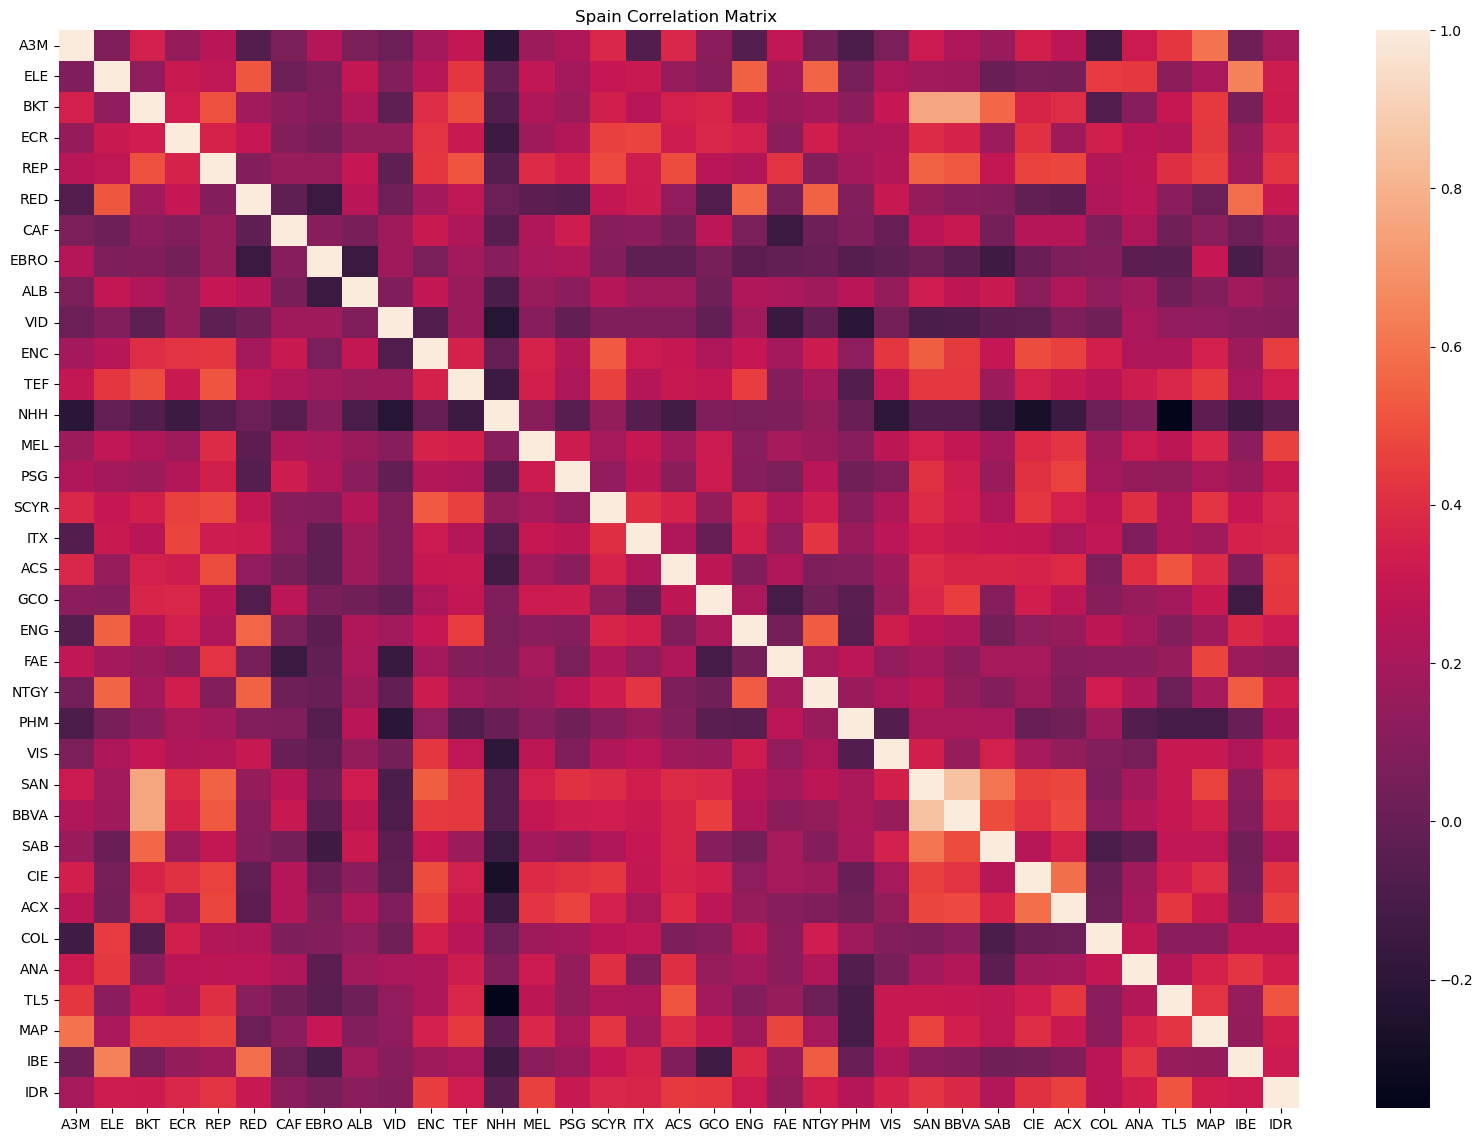

In [200]:
plt.figure(figsize=(20, 14))
sns.heatmap(cor_matrix, annot=False)
plt.title("Spain Correlation Matrix ")
plt.show()

In [201]:
#extracts the indices from the correlation matrix, which are the stocks
corInd_matrix = stocks_spain.iloc[:,1:].corr()
stocks = corInd_matrix.index.values
stocks

array(['A3M', 'ELE', 'BKT', 'ECR', 'REP', 'RED', 'CAF', 'EBRO', 'ALB',
       'VID', 'ENC', 'TEF', 'NHH', 'MEL', 'PSG', 'SCYR', 'ITX', 'ACS',
       'GCO', 'ENG', 'FAE', 'NTGY', 'PHM', 'VIS', 'SAN', 'BBVA', 'SAB',
       'CIE', 'ACX', 'COL', 'ANA', 'TL5', 'MAP', 'IBE', 'IDR'],
      dtype=object)

In [202]:
#Changes from dataframe to matrix, so it is easier to create a graph with networkx
cor_matrix = np.asmatrix(cor_matrix)
print(cor_matrix)

[[1.         0.07427665 0.34796327 ... 0.59681359 0.01604916 0.19734731]
 [0.07427665 1.         0.12943684 ... 0.20285582 0.64037421 0.32421795]
 [0.34796327 0.12943684 1.         ... 0.44074264 0.05437186 0.31904668]
 ...
 [0.59681359 0.20285582 0.44074264 ... 1.         0.1448143  0.33472831]
 [0.01604916 0.64037421 0.05437186 ... 0.1448143  1.         0.31541898]
 [0.19734731 0.32421795 0.31904668 ... 0.33472831 0.31541898 1.        ]]


In [203]:
from networkx.classes.function import edges
#Crates graph using the data of the correlation matrix
G = nx.from_numpy_array(cor_matrix)

#relabels the nodes to match the stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

In [204]:
G.nodes

NodeView(('A3M', 'ELE', 'BKT', 'ECR', 'REP', 'RED', 'CAF', 'EBRO', 'ALB', 'VID', 'ENC', 'TEF', 'NHH', 'MEL', 'PSG', 'SCYR', 'ITX', 'ACS', 'GCO', 'ENG', 'FAE', 'NTGY', 'PHM', 'VIS', 'SAN', 'BBVA', 'SAB', 'CIE', 'ACX', 'COL', 'ANA', 'TL5', 'MAP', 'IBE', 'IDR'))

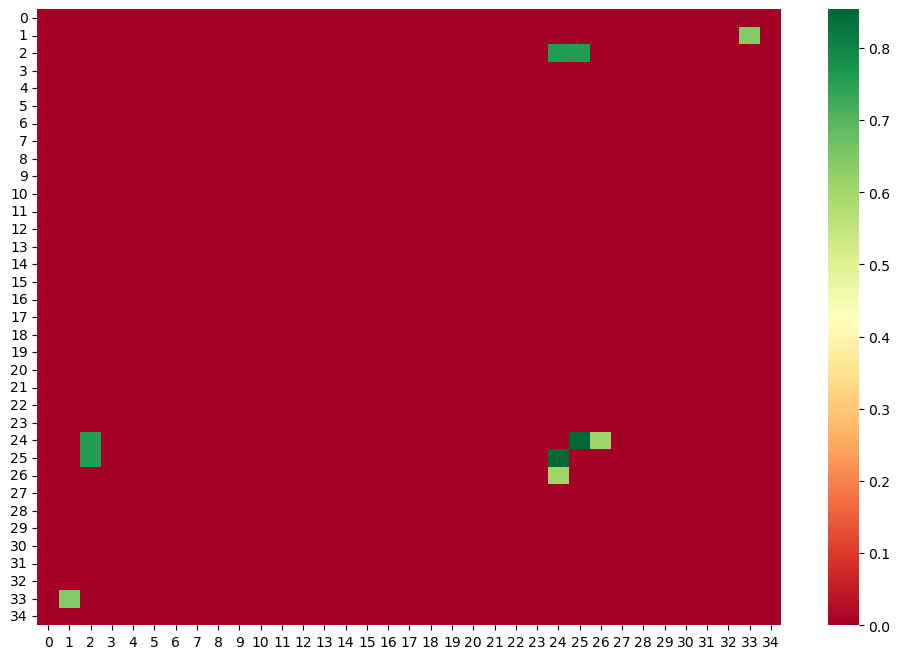

In [206]:
umbral = 0.6

#build new matrix
matrix_new = np.array(cor_matrix)  
#use np.where as filter with the below conditions
positive_corr = np.where(((matrix_new > umbral) & (matrix_new < 1.0)), matrix_new, 0)
negative_corr = np.where(matrix_new < 0, matrix_new, 0)

plt.figure(figsize=(12, 8))
sns.heatmap(positive_corr, annot=False, cmap='RdYlGn')
plt.show()

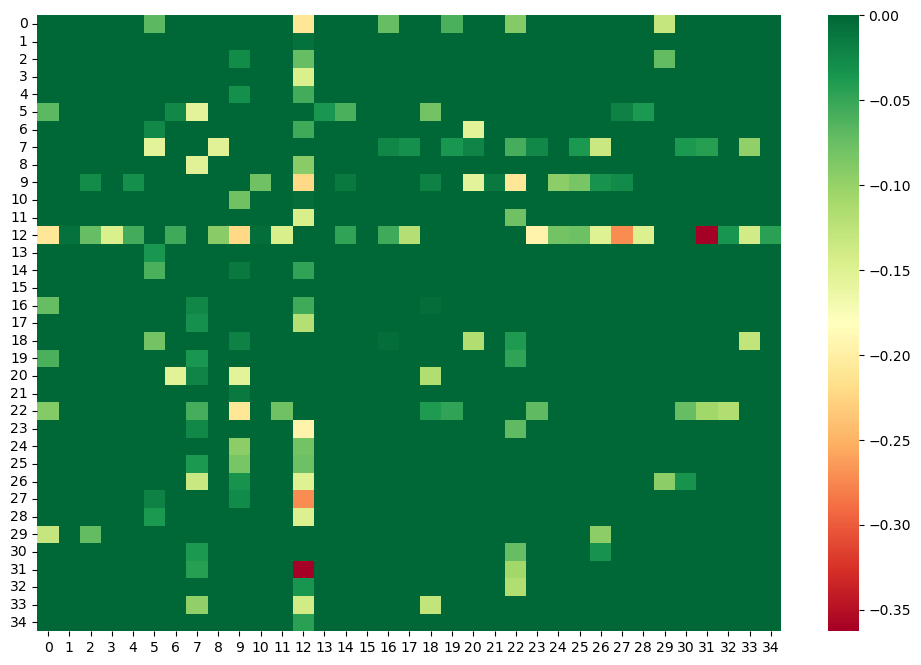

In [207]:
plt.figure(figsize=(12, 8))
sns.heatmap(negative_corr, annot=False, cmap='RdYlGn')
plt.show()

In [208]:
import math

# vfunc permite obtener la distancia a partir de las correlaciones 

distance = lambda c:  math.sqrt(2*(1-c))
vfunc = np.vectorize(distance)
distances = vfunc(positive_corr)
print(distances)

# Filtramos para representar solo aquellas distancias inferiores a min_distance
max_distance = math.sqrt(2*(1-umbral))
print(f'max_distance = {max_distance}')
positive_dist = np.where((distances < max_distance), distances, 0)
print(positive_dist)

[[1.41421356 1.41421356 1.41421356 ... 1.41421356 1.41421356 1.41421356]
 [1.41421356 1.41421356 1.41421356 ... 1.41421356 0.84808702 1.41421356]
 [1.41421356 1.41421356 1.41421356 ... 1.41421356 1.41421356 1.41421356]
 ...
 [1.41421356 1.41421356 1.41421356 ... 1.41421356 1.41421356 1.41421356]
 [1.41421356 0.84808702 1.41421356 ... 1.41421356 1.41421356 1.41421356]
 [1.41421356 1.41421356 1.41421356 ... 1.41421356 1.41421356 1.41421356]]
max_distance = 0.8944271909999159
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.84808702 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.84808702 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [209]:
from networkx.classes.function import edges
#Crates graph using the data of the correlation matrix
G_positive = nx.from_numpy_array(positive_dist)

#relabels the nodes to match the  stocks names
G_positive = nx.relabel_nodes(G_positive,lambda x: stocks[x])

In [210]:
G_positive.adj

AdjacencyView({'A3M': {}, 'ELE': {'IBE': {'weight': 0.8480870151422483}}, 'BKT': {'SAN': {'weight': 0.6957511047462477}, 'BBVA': {'weight': 0.6956640852134426}}, 'ECR': {}, 'REP': {}, 'RED': {}, 'CAF': {}, 'EBRO': {}, 'ALB': {}, 'VID': {}, 'ENC': {}, 'TEF': {}, 'NHH': {}, 'MEL': {}, 'PSG': {}, 'SCYR': {}, 'ITX': {}, 'ACS': {}, 'GCO': {}, 'ENG': {}, 'FAE': {}, 'NTGY': {}, 'PHM': {}, 'VIS': {}, 'SAN': {'BKT': {'weight': 0.6957511047462477}, 'BBVA': {'weight': 0.5409563430778819}, 'SAB': {'weight': 0.8887605468065272}}, 'BBVA': {'BKT': {'weight': 0.6956640852134426}, 'SAN': {'weight': 0.5409563430778819}}, 'SAB': {'SAN': {'weight': 0.8887605468065272}}, 'CIE': {}, 'ACX': {}, 'COL': {}, 'ANA': {}, 'TL5': {}, 'MAP': {}, 'IBE': {'ELE': {'weight': 0.8480870151422483}}, 'IDR': {}})

In [211]:
# get a list of nodes with no edges
isolates = list(nx.isolates(G_positive))

# remove the isolated nodes from the graph
G_positive.remove_nodes_from(isolates)

In [212]:
# Compute the sum of weights for each node
node_weights = {}
for node in G_positive.nodes():
    node_weights[node] = sum([edge[2]['weight'] for edge in G_positive.edges(node, data=True)])

# Normalize the sum of weights for each node
total_weight = sum(node_weights.values())
for node in node_weights:
    node_weights[node] /= total_weight

# Set the size of each node proportional to its normalized sum of weights
node_sizes = [node_weights[node]*30000 for node in G_positive.nodes()]

# Adjust the layout
pos = nx.kamada_kawai_layout(G_positive)





In [213]:
from pandas.core.arrays.categorical import CategoricalAccessor
# Define the categories of each node
tickers = pd.read_excel(f'{path}data/tickers.xlsx')

# Discard columns that are not necessary
tickers = tickers.loc[:,'Simbolo':'Sector']
tickers['Simbolo'] = tickers['Simbolo'].str.slice(stop=-3)
#print(tickers)

# Create a dictionary where each row represents a key-value pair
ticker_category = dict(zip(tickers['Simbolo'], tickers['Sector']))
print(f'Ticker category: {ticker_category}')

# Get a list of all possible values of the values of the dictionary
node_categories = list(set(ticker_category.values()))
print(f'Node categories: {node_categories}')

# Define a color map for each category
category_colors = {'Petrol and Power': 'red', 'Technology and Telecommunications': 'blue', 'Financial Services':'brown', 'Consumer Goods':'green', 'Consumer Services':'yellow', 'Real Estate Services':'grey', 'Basic Mat., Industry and Construction':'orange'}

# Create a list of colors for each node
node_colors = [category_colors[ticker_category[n]] for n in G_positive.nodes()]


Ticker category: {'A3M': 'Consumer Services', 'ACS': 'Basic Mat., Industry and Construction', 'ACX': 'Basic Mat., Industry and Construction', 'AENA': 'Consumer Services', 'ALB': 'Financial Services', 'ALM': 'Consumer Goods', 'AMS': 'Technology and Telecommunications', 'ANA': 'Basic Mat., Industry and Construction', 'APPS': 'Basic Mat., Industry and Construction', 'BBVA': 'Financial Services', 'BKT': 'Financial Services', 'CABK': 'Financial Services', 'CAF': 'Basic Mat., Industry and Construction', 'CIE': 'Basic Mat., Industry and Construction', 'CLNX': 'Technology and Telecommunications', 'COL': 'Real Estate Services', 'DIA': 'Consumer Services', 'DOM': 'Technology and Telecommunications', 'EBRO': 'Consumer Goods', 'ECR': 'Basic Mat., Industry and Construction', 'EDR': 'Consumer Services', 'ELE': 'Petrol and Power', 'ENC': 'Consumer Goods', 'ENG': 'Petrol and Power', 'FAE': 'Consumer Goods', 'FDR': 'Basic Mat., Industry and Construction', 'FER': 'Basic Mat., Industry and Construction',

In [214]:
#Revisar por que las que no pinto aristas no tienen color #################

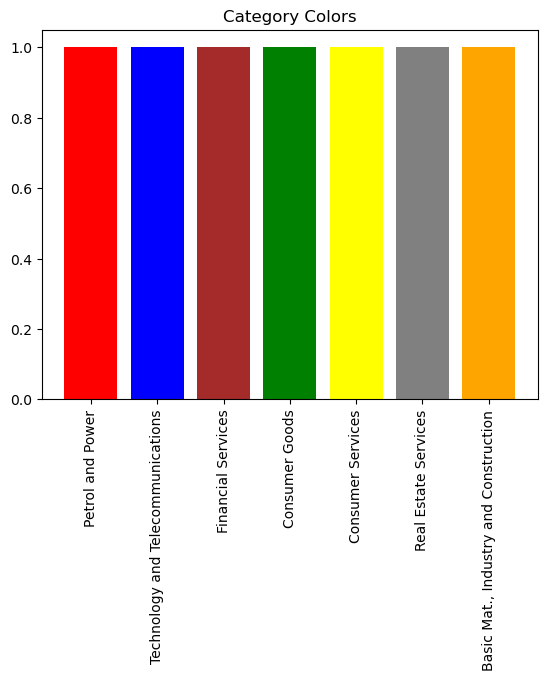

In [215]:
# Create a list of the categories and colors
categories = list(category_colors.keys())
colors = list(category_colors.values())

# Create a bar plot with a rectangle for each color
fig, ax = plt.subplots()
for i in range(len(colors)):
    ax.bar(i, 1, color=colors[i])

# Set the tick labels and title
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories, rotation=90)
ax.set_title('Category Colors')

# Show the plot
plt.show()

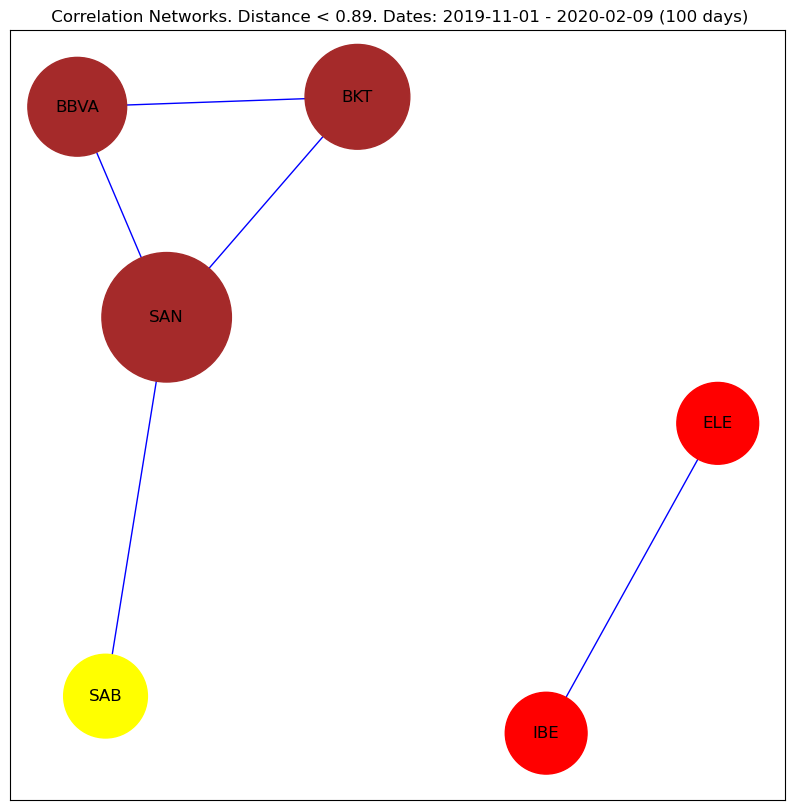

In [216]:
plt.subplots(figsize=(10,10))
nx.draw_networkx_nodes(G_positive, pos, node_size=node_sizes, node_color=node_colors)
nx.draw_networkx_edges(G_positive, pos, edge_color = 'blue')
nx.draw_networkx_labels(G_positive, pos)
plt.title(f" Correlation Networks. Distance < {round(max_distance,2)}. Dates: {str(start_date)[:-9]} - {str(finish_date)[:-9]} ({time} days)")
plt.show()

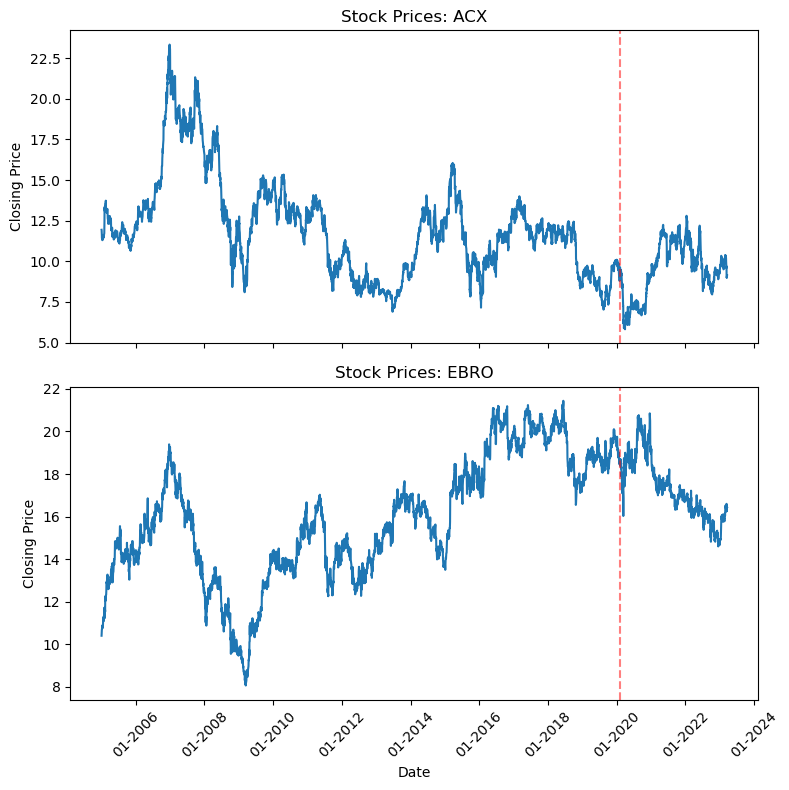

In [217]:
import datetime as dt
import matplotlib.pyplot as plt

# set the date to plot the vertical bar
red_line_date = finish_date

# Plotting the 3 companies with more correlation
#companies = ['SAN', 'BBVA', 'CABK']
companies = ['ACX', 'EBRO']
dates = stocks_spain['Date']

# create a figure with subplots for each company
fig, axs = plt.subplots(nrows=len(companies), ncols=1, figsize=(8, 8), sharex=True)

# iterate over the companies and create a subplot for each one
for i, company in enumerate(companies):
    # select the prices for the current company
    prices = stocks_spain[company]
    
    # plot the prices on the current subplot
    axs[i].plot(dates, prices)
    
    # set the x-axis tick labels and rotation
    axs[i].xaxis.set_major_locator(date_locator)
    axs[i].xaxis.set_major_formatter(date_formatter)
    axs[i].xaxis.set_tick_params(rotation=45)

    # plot the vertical red line at the specified date
    axs[i].axvline(x=red_line_date, color='r', linestyle='--', alpha=0.5)
    
    # set the subplot title and axis labels
    axs[i].set_title(f'Stock Prices: {company}')
    axs[i].set_ylabel('Closing Price')

# set the x-axis label on the bottom subplot
axs[-1].set_xlabel('Date')

# adjust the subplots to prevent overlapping labels
fig.tight_layout()

# show the plot
plt.show()


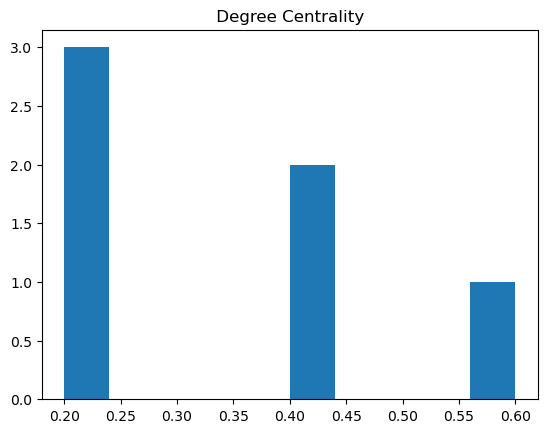

In [218]:
degree_centrality = nx.degree_centrality(G_positive)
plt.figure()
plt.hist(list(degree_centrality.values()))
plt.title(" Degree Centrality ")
plt.show()

In [219]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()



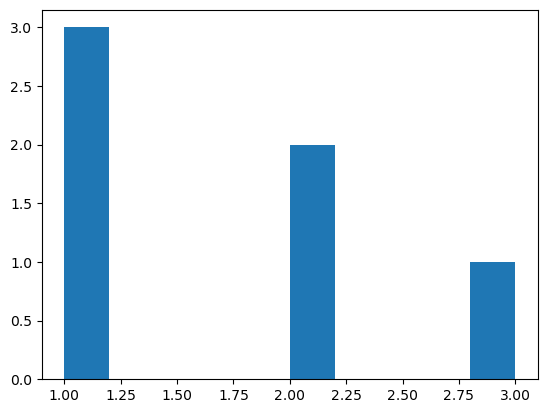

In [220]:
plot_degree_dist(G_positive)

In [221]:
#Density of Graph

nx.density(G_positive)

0.3333333333333333

In [222]:
#Transitivity of Graph

nx.transitivity(G_positive)

0.6

Study evolution of correlation between companies over time

In [223]:
time = 100
dates = stocks_spain['Date'][time:]

correlation_list = []
for date in dates:
    stocks_filter_2, start_date, finish_date = DateFilter (time, finish_date_str = date)

    # Calculate returns
    logreturn = np.log(stocks_filter_2.iloc[:,1:]).diff()
    logreturn = logreturn.iloc[1: , :]
    
    #craetes a correlation matrix
    corr_matrix = logreturn.corr()
    # Calculate the sum of all correlation coefficients, excluding the diagonal
    sum_corr = sum(corr_matrix.values.flatten()) - len(corr_matrix)

    # Calculate the total number of correlation coefficients, excluding the diagonal
    n_corr = len(corr_matrix)*(len(corr_matrix)-1)

    # Calculate the mean correlation
    mean_corr = sum_corr/n_corr

    #print(f"On date '{date}' the mean correlation between all companies is: {mean_corr}")
    correlation_list.append(mean_corr)


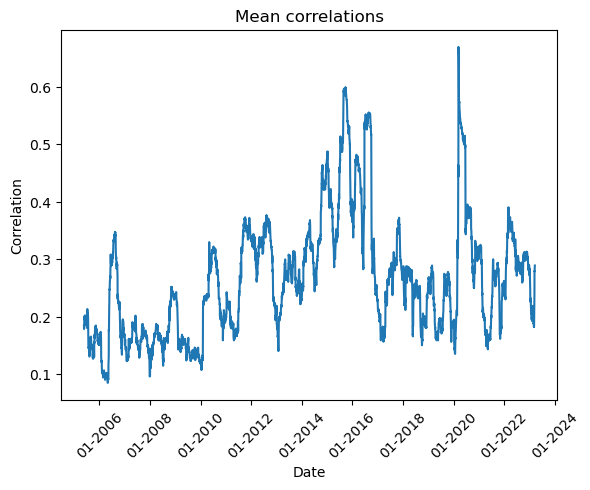

In [224]:
# Plot the mean correlation over time

fi, ax = plt.subplots()
ax.plot(dates, correlation_list)

date_locator = AutoDateLocator()
date_formatter = DateFormatter('%m-%Y')
ax.xaxis.set_major_locator(date_locator)
ax.xaxis.set_major_formatter(date_formatter)
ax.xaxis.set_tick_params(rotation=45)

# Set the plot title
ax.set_title('Mean correlations')
ax.set_xlabel('Date')
ax.set_ylabel('Correlation')

plt.show()